In [80]:
# Import packages
import os
import pandas as pd
import numpy as np
import re 
import networkx as nx
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap
import bokeh.palettes as palette # For palette of colors

from matplotlib import rc

# Latex rendering for plotting
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

# Define color palette
col = palette.brewer['Spectral'][10] #(8)

# conda install -c conda-forge/label/cf202003 basemap 
# How I solve the installation problem
# https://stackoverflow.com/questions/63839163/maplotlib-and-basemap-cannot-import-name-dedent 
# conda install -c conda-forge basemap-data-hires

folder_name = 'plot/'
# Create data folder
if not os.path.isdir('./'+folder_name):
    os.mkdir('./'+folder_name)

/Users/alicepagano/anaconda3/envs/life/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


In [81]:
tweet = pd.read_excel('data/14-19_tweet.xlsx',engine='openpyxl',index_col=0,header=[0,1])
tweet[('tweet','id_original')] = tweet[('tweet','id')]
#tweet = tweet.drop(tweet[(tweet[("user","city")].isnull())].index)

retweet = pd.read_excel('data/14-19_retweet.xlsx',engine='openpyxl',index_col=0,header=[0,1])
#retweet = retweet.drop(retweet[(retweet[("user","city")].isnull())].index)

tweet[('user','lat')] = tweet[('user','lat_province')]
tweet[('user','lon')] = tweet[('user','lon_province')]

# If city is null, associate latitude and longitude of the region
mask = tweet[("user","city")].isnull()
tweet.loc[mask,("user","lat")] = tweet.loc[mask,("user","lat_region")]
tweet.loc[mask,("user","lon")] = tweet.loc[mask,("user","lon_region")]

retweet[('user','lat')] = retweet[('user','lat_province')]
retweet[('user','lon')] = retweet[('user','lon_province')]

# If city is null, associate latitude and longitude of the region
mask = retweet[("user","city")].isnull()
retweet.loc[mask,("user","lat")] = retweet.loc[mask,("user","lat_region")]
retweet.loc[mask,("user","lon")] = retweet.loc[mask,("user","lon_region")]


df = pd.concat([tweet,retweet])

df

tweet                                       \
                   created_at favorites_count                   id   
0  2020-12-18 23:25:12.000000               7  1340075670903397888   
1  2020-12-18 23:19:16.999999               1  1340074182542041088   
2  2020-12-18 22:56:55.000000               1  1340068555816103936   
8  2020-12-18 22:07:59.000000               3  1340056238776839936   
11 2020-12-18 21:54:45.000000               1  1340052911171186944   
..                        ...             ...                  ...   
86 2020-12-15 08:24:53.000000               0  1338761937774054912   
87 2020-12-15 08:16:12.000000               0  1338759751061152000   
92 2020-12-15 15:01:39.000000               0  1338861787580571904   
95 2020-12-14 13:01:04.000000               0  1338469052898009088   
96 2020-12-14 07:15:03.000000               0  1338381975997062912   

                                                               \
            id_original in_reply_to_screen_name retweet_count   
0   1340075670903397888                  valy_s             3   
1   1340074182542041088                     NaN             1   
2   1340068555816103936         Stefani86423248             0   
8   1340056238776839936               Quirinale             0   
11  1340052911171186944                     NaN             0   
..                  ...                     ...           ...   
86  1338758594972495872                     NaN             4   
87  1338758594972495872                     NaN             4   
92  1338564869524774912                     NaN             2   
95  1338462253239194112                     NaN             1   
96  1338369110728723968                     NaN             2   

                                                          user              \
                                                 text     city code_region   
0   @valy_s Stanno testando la resistenza del paes...      NaN           7   
1   #GovernodellaVergogna #truffacovid #dittaturas...   rimini           8   
2   @Stefani86423248 La Svezia ha stravinto per 2 ...   napoli          15   
8   @Quirinale #DittaturaSanitaria  #DittaturaPerf...      NaN          15   
11  Penso che nessuno rispetterà il nuovo #DPCM, g...  saronno           3   
..                                                ...      ...         ...   
86  RT @MassimoUrsino: Le lingue biforcute dei gio...   modena           8   
87  RT @MassimoUrsino: Le lingue biforcute dei gio...   modena           8   
92  RT @DomenicoMarotta: Gli "Assembramenti irresp...   milano           3   
95  RT @AssiElena: Allora ditelo.chh ci prendete p...      NaN           3   
96  RT @parpinellivo: Finita l'astinenza, il centr...      NaN           5   

                               ...                                     \
                   created_at  ...        lat lat_province lat_region   
0  2011-04-07 21:57:36.000000  ...  44.407260          NaN  44.407260   
1  2020-05-12 01:13:50.000000  ...  43.947098    43.947098        NaN   
2  2020-08-18 13:17:29.000000  ...  40.835934    40.835934  40.835934   
8  2017-08-31 20:44:21.000000  ...  40.835934          NaN  40.835934   
11 2012-12-28 17:15:39.000000  ...  45.839713    45.839713  45.466800   
..                        ...  ...        ...          ...        ...   
86 2015-11-11 16:15:05.999999  ...  44.538473    44.538473        NaN   
87 2017-01-19 10:34:07.000001  ...  44.538473    44.538473        NaN   
92 2009-09-03 20:24:17.000000  ...  45.466800    45.466800        NaN   
95 2018-07-27 19:23:32.999999  ...  45.466800    45.779580  45.466800   
96 2016-06-18 07:03:08.000000  ...  45.437191          NaN  45.437191   

                                                                        \
                  location        lon lon_province lon_region province   
0            liguria italy   8.933862          NaN   8.933862      NaN   
1                   rimini  12.630769    12.630769        NaN   rimini   
2     

In [82]:
#tweet[tweet[('tweet','id')]==1338369110728723968]

In [83]:
# Create region list of Italy
df_region = pd.read_excel('italian_regions_dataset.xlsx',engine='openpyxl',index_col=0,header=[0])
df_region["capitals"] = df_region["capitals"].str.upper()

In [84]:
#graph = nx.nx.from_pandas_edgelist(df, source = ('tweet','id_original'), target = ('tweet','id'), 
#                                   create_using = nx.DiGraph())

# Create network
graph = nx.Graph()
graph.add_nodes_from(list(df[('tweet','id')]))
graph.add_edges_from( list(zip(retweet[('tweet','id_original')],retweet[('tweet','id')])) )

print('# of edges: {}'.format(graph.number_of_edges()))
print('# of nodes: {}'.format(graph.number_of_nodes()))

# of edges: 36
# of nodes: 167


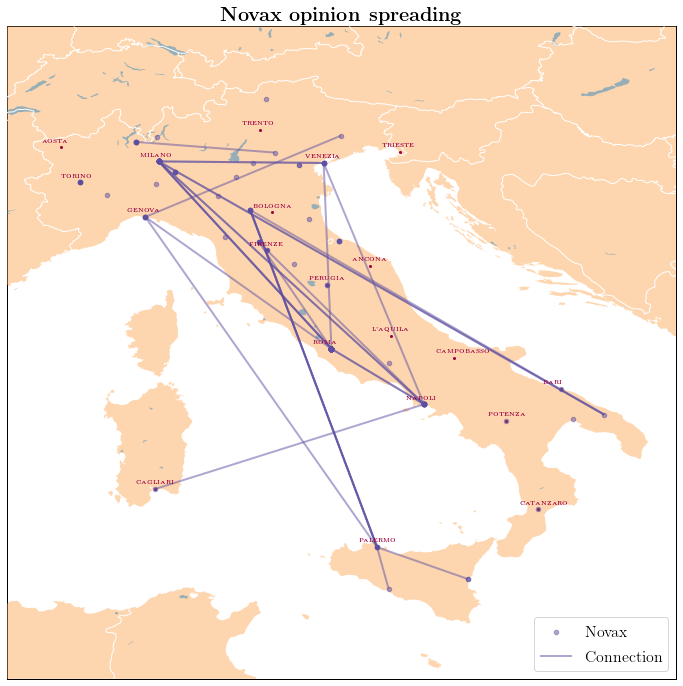

In [85]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon 
# sono i valori di lat/long degli angoli inferiori sinistro e superiore destro della mappa. 
# lat_0 lon_0 sono le coordinate del centro mappa
#m = Basemap(llcrnrlon=4.30, llcrnrlat=33.24, urcrnrlon=28.56, urcrnrlat=48.04,
#            lat_0=12.49, lon_0=41.92, resolution='h', epsg=4326, suppress_ticks=True)

# Create basemap
plt.figure(figsize = (12,12))
m = Basemap(llcrnrlon=6.30, llcrnrlat=35.6, urcrnrlon=19.06, urcrnrlat=48.04,
            lat_0=12.782117, lon_0=42.831995, resolution='h', epsg=4326, suppress_ticks=True)

m.drawmapboundary(fill_color='white',zorder=0)
m.fillcontinents(color=col[6],lake_color=col[1], alpha=0.5,zorder=1)
m.drawcountries(linewidth=1, color='white', zorder=2)
#m.drawcoastlines(linewidth=1, color='white', zorder=2)

# Plot city names on the basemap
for index, row in df_region.iterrows():
    m.plot(row['lon'],row['lat'],marker='o',color=col[9],markersize=2, alpha=1,zorder=3)
    plt.text(row['lon']-0.35, row['lat']+0.1, r'\bf{'+str(row['capitals'])+'}', color=col[9], fontsize=5,zorder=6)

# Create position dictionary
mx, my = m(df[('user','lon')].values, df[('user','lat')].values)
pos = {}
for count, elem in enumerate (df[('tweet','id')]):
    pos[elem] = (mx[count], my[count])

# Draw network on the basemap
collection = nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = graph.nodes(), 
                        node_color = col[0], alpha = 0.5, node_size = 20, label='Novax') 
collection.set_zorder(4)

collection = nx.draw_networkx_edges(G = graph, pos = pos, edge_color=col[0],
                        alpha=0.5, width=2, arrows = False, label='Connection')
collection.set_zorder(5)

#nx.draw_networkx_labels(G=graph, pos=pos)

plt.title(r'\bf{Novax opinion spreading}',fontsize=20)
plt.legend(loc='lower right',fontsize=16)
plt.savefig("plot/map.pdf",format='pdf',bbox_inches = "tight")
plt.show()